In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [4]:
file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - max_lag:]

X_columns = []
y_columns = []

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')
    y_columns.extend([f't_(-{lag})_Close', f't_(-{lag})_Open', f't_(-{lag})_High'])

X_train = train_data[X_columns]
y_train = train_data[y_columns]

X_test = test_data[X_columns]
y_test = test_data[y_columns]

MAE: 0.02830421612044152
RMSE: 0.02972563381354313
MAPE: 3.1428704941199657%


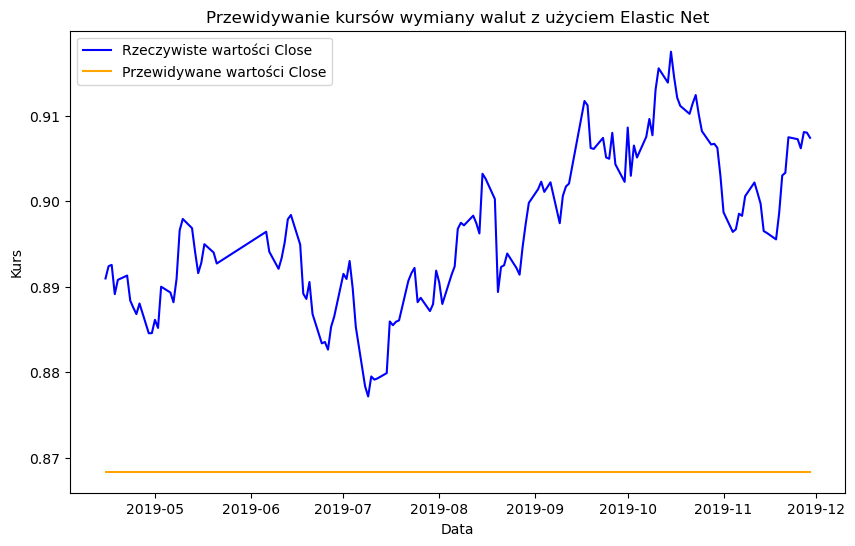

--- 0.0 seconds ---


In [5]:
from sklearn.linear_model import ElasticNet

# Elastic Net
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  
elastic_net_model.fit(X_train, y_train)

y_pred = elastic_net_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAE: {mae:}')
print(f'RMSE: {rmse:}')
print(f'MAPE: {mape:}%')

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], y_test['t_(-10)_Close'], label='Rzeczywiste wartości Close', color='blue')
plt.plot(test_data['Date'], y_pred[:, 0], label='Przewidywane wartości Close', color='orange')

plt.title('Przewidywanie kursów wymiany walut z użyciem Elastic Net')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()
plt.show()

Zbiór treningowy:
MAE: 0.029453021074998965
RMSE: 0.03717433898936554
MAPE: 3.3752512917020585%

Zbiór testowy:
MAE: 0.02830421612044152
RMSE: 0.02972563381354313
MAPE: 3.1428704941199657%


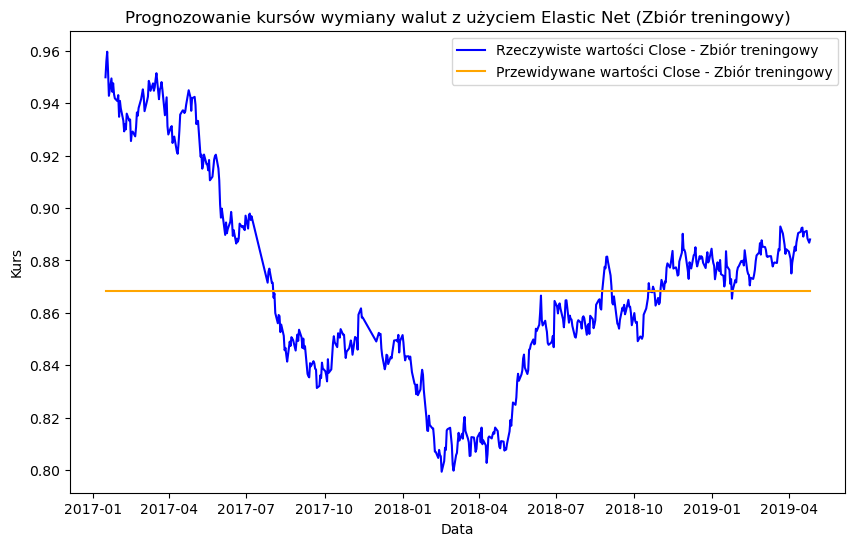

--- 0.0 seconds ---


In [6]:
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  
elastic_net_model.fit(X_train, y_train)

y_pred_train = elastic_net_model.predict(X_train)
y_pred_test = elastic_net_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print('Zbiór treningowy:')
print(f'MAE: {mae_train}')
print(f'RMSE: {rmse_train}')
print(f'MAPE: {mape_train}%')

print('\nZbiór testowy:')
print(f'MAE: {mae_test}')
print(f'RMSE: {rmse_test}')
print(f'MAPE: {mape_test}%')

plt.figure(figsize=(10, 6))

plt.plot(train_data['Date'], y_train['t_(-10)_Close'], label='Rzeczywiste wartości Close - Zbiór treningowy', color='blue')
plt.plot(train_data['Date'], y_pred_train[:, 0], label='Przewidywane wartości Close - Zbiór treningowy', color='orange')

plt.title('Prognozowanie kursów wymiany walut z użyciem Elastic Net (Zbiór treningowy)')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()
plt.show()

DecisionTreeRegressor - MAE: 0.0038286619373776856, RMSE: 0.004883598550045177
SVR - MAE: 0.022902746575342536, RMSE: 0.02457542659073168
RandomForestRegressor - MAE: 0.003950999999999967, RMSE: 0.005070004183646333


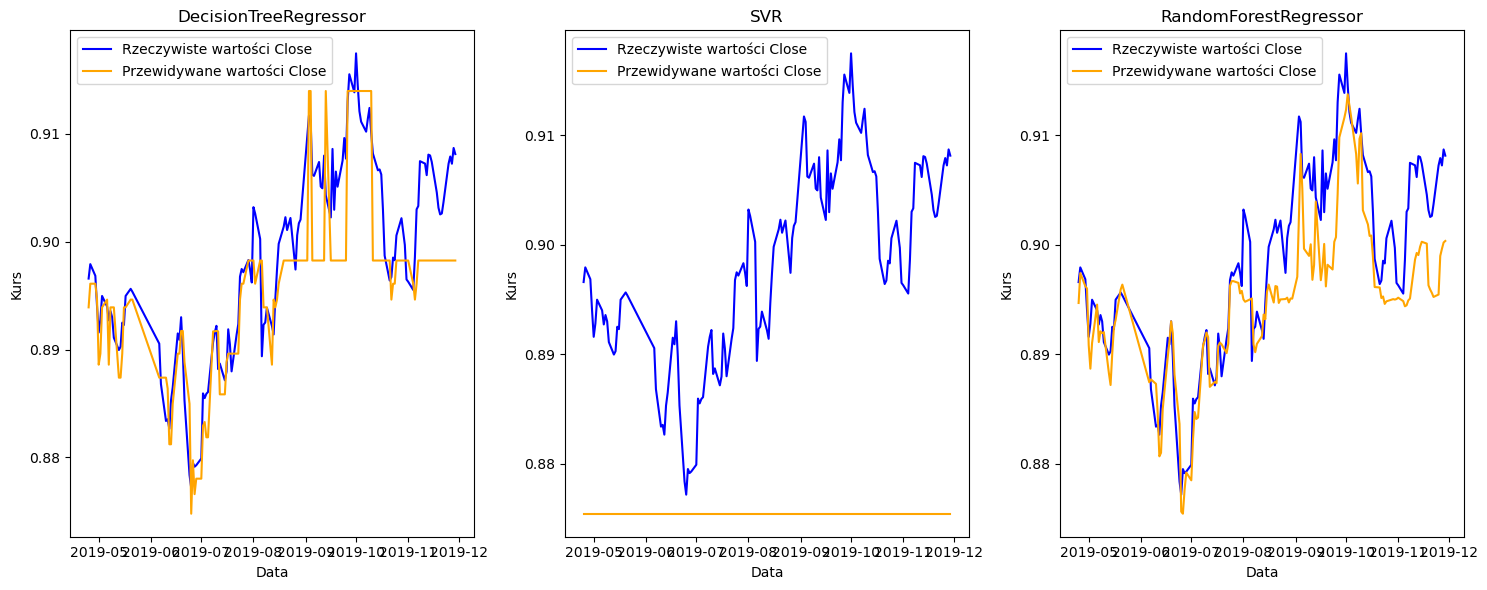

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Wczytaj dane
file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia['t_Close'] = przedpandemia['Close']
przedpandemia['t_Open'] = przedpandemia['Open']
przedpandemia['t_High'] = przedpandemia['High']

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - 2:]

X_columns = []
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Dostosowanie hiperparametrów dla DecisionTreeRegressor
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search_tree.fit(X_train, y_train)

best_tree_model = grid_search_tree.best_estimator_
y_pred_tree = best_tree_model.predict(X_test)

# Normalizacja danych dla SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_svr = SVR()
model_svr.fit(X_train_scaled, y_train)

y_pred_svr = model_svr.predict(X_test_scaled)

# Użycie RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

# Ocena modeli
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = sqrt(mean_squared_error(y_test, y_pred_tree))
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = sqrt(mean_squared_error(y_test, y_pred_svr))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'DecisionTreeRegressor - MAE: {mae_tree:}, RMSE: {rmse_tree:}')
print(f'SVR - MAE: {mae_svr:}, RMSE: {rmse_svr:}')
print(f'RandomForestRegressor - MAE: {mae_rf:}, RMSE: {rmse_rf:}')

# Wykresy
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
plt.plot(test_data['Date'], y_pred_tree, label='Przewidywane wartości Close', color='orange')
plt.title('DecisionTreeRegressor')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
plt.plot(test_data['Date'], y_pred_svr, label='Przewidywane wartości Close', color='orange')
plt.title('SVR')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
plt.plot(test_data['Date'], y_pred_rf, label='Przewidywane wartości Close', color='orange')
plt.title('RandomForestRegressor')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()

plt.tight_layout()
plt.show()

DecisionTreeRegressor - MAE: 0.002584595890410978, RMSE: 0.0042802625295556345
SVR - MAE: 0.022902746575342536, RMSE: 0.02457542659073168
RandomForestRegressor - MAE: 0.0024711089041094553, RMSE: 0.0038411795598700866


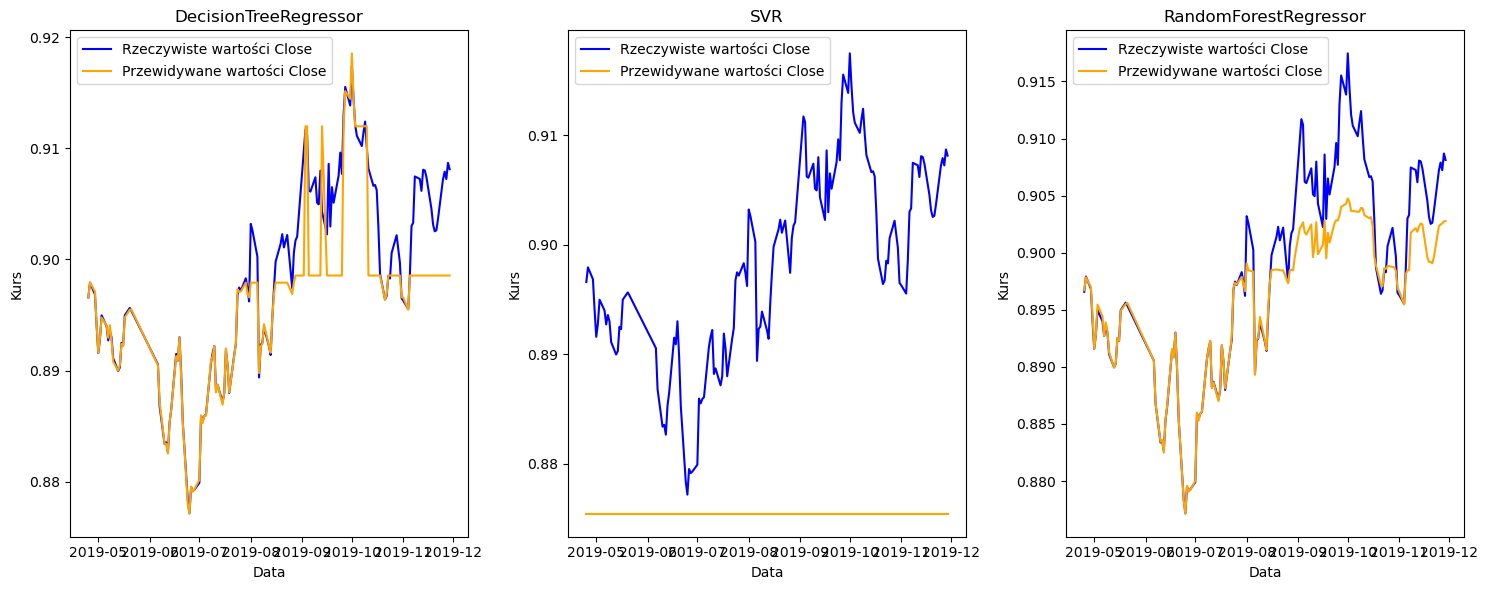

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import ta

# Definicja okresu ważonej średniej ruchomej
okres_wma = 10

# Wczytaj dane
file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

# Przetwarzanie danych
przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

# Dodaj kolumnę SAR
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()

# Dodaj kolumny ważonej średniej ruchomej (WMA)
przedpandemia['Close_WMA'] = przedpandemia['Close'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['Open_WMA'] = przedpandemia['Open'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['High_WMA'] = przedpandemia['High'].rolling(window=okres_wma, min_periods=1).mean()

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High', 'SAR']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)
        # Dodaj ważoną średnią ruchomą
        wma_column_name = f'{new_column_name}_WMA'
        przedpandemia[wma_column_name] = przedpandemia[new_column_name].rolling(window=okres_wma, min_periods=1).mean()

# Dodaj kolumny dla obydwu wskaźników analizy technicznej
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()
przedpandemia['SAR_WMA'] = przedpandemia['SAR'].rolling(window=okres_wma, min_periods=1).mean()

# Dostosuj resztę kodu
przedpandemia['t_Close'] = przedpandemia['Close']
przedpandemia['t_Open'] = przedpandemia['Open']
przedpandemia['t_High'] = przedpandemia['High']

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - 2:]

X_columns = []
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')
        X_columns.append(f't_(-{lag})_{column}_WMA')
        X_columns.append(f'{column}_WMA')
        X_columns.append(f'{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Dostosowanie hiperparametrów dla DecisionTreeRegressor
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search_tree.fit(X_train, y_train)

best_tree_model = grid_search_tree.best_estimator_
y_pred_tree = best_tree_model.predict(X_test)

# Normalizacja danych dla SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_svr = SVR()
model_svr.fit(X_train_scaled, y_train)

y_pred_svr = model_svr.predict(X_test_scaled)

# Użycie RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

# Ocena modeli
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = sqrt(mean_squared_error(y_test, y_pred_tree))
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = sqrt(mean_squared_error(y_test, y_pred_svr))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'DecisionTreeRegressor - MAE: {mae_tree}, RMSE: {rmse_tree}')
print(f'SVR - MAE: {mae_svr}, RMSE: {rmse_svr}')
print(f'RandomForestRegressor - MAE: {mae_rf}, RMSE: {rmse_rf}')

# Wykresy
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
plt.plot(test_data['Date'], y_pred_tree, label='Przewidywane wartości Close', color='orange')
plt.title('DecisionTreeRegressor')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
plt.plot(test_data['Date'], y_pred_svr, label='Przewidywane wartości Close', color='orange')
plt.title('SVR')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
plt.plot(test_data['Date'], y_pred_rf, label='Przewidywane wartości Close', color='orange')
plt.title('RandomForestRegressor')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()

plt.tight_layout()
plt.show()

DecisionTreeRegressor - MAE: 0.00731194710806697, RMSE: 0.00933660602145522
SVR - MAE: 0.022902746575342536, RMSE: 0.02457542659073168
RandomForestRegressor - MAE: 0.005940003424657506, RMSE: 0.007491728066555769


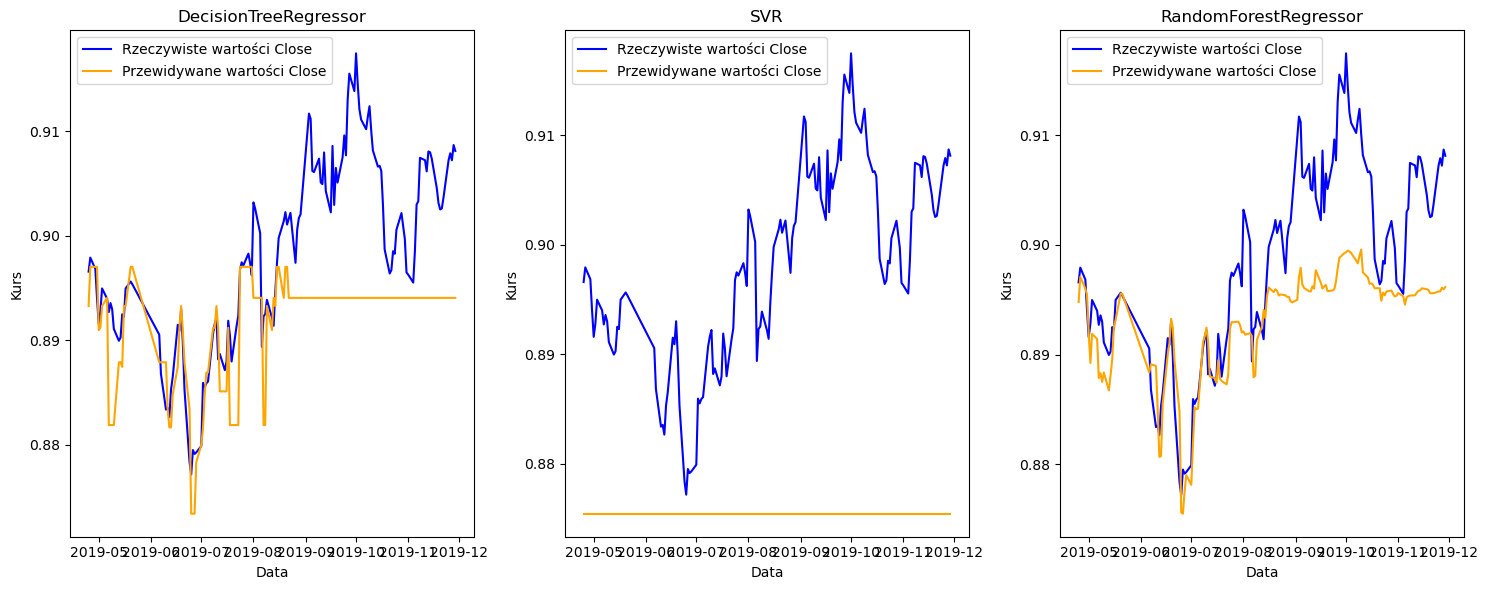

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import ta

# Definicja okresu ważonej średniej ruchomej
okres_wma = 10

# Wczytaj dane
file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

# Przetwarzanie danych
przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

# Dodaj kolumnę SAR
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High', 'SAR']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)
        # Dodaj ważoną średnią ruchomą
        wma_column_name = f'{new_column_name}_WMA'
        przedpandemia[wma_column_name] = przedpandemia[new_column_name].rolling(window=okres_wma, min_periods=1).mean()

przedpandemia['t_Close'] = przedpandemia['Close']
przedpandemia['t_Open'] = przedpandemia['Open']
przedpandemia['t_High'] = przedpandemia['High']

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - 2:]

X_columns = []
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')
        X_columns.append(f't_(-{lag})_{column}_WMA')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Dostosowanie hiperparametrów dla DecisionTreeRegressor
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search_tree.fit(X_train, y_train)

best_tree_model = grid_search_tree.best_estimator_
y_pred_tree = best_tree_model.predict(X_test)

# Normalizacja danych dla SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_svr = SVR()
model_svr.fit(X_train_scaled, y_train)

y_pred_svr = model_svr.predict(X_test_scaled)

# Użycie RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

# Ocena modeli
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = sqrt(mean_squared_error(y_test, y_pred_tree))
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = sqrt(mean_squared_error(y_test, y_pred_svr))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'DecisionTreeRegressor - MAE: {mae_tree}, RMSE: {rmse_tree}')
print(f'SVR - MAE: {mae_svr}, RMSE: {rmse_svr}')
print(f'RandomForestRegressor - MAE: {mae_rf}, RMSE: {rmse_rf}')

# Wykresy
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
plt.plot(test_data['Date'], y_pred_tree, label='Przewidywane wartości Close', color='orange')
plt.title('DecisionTreeRegressor')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
plt.plot(test_data['Date'], y_pred_svr, label='Przewidywane wartości Close', color='orange')
plt.title('SVR')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
plt.plot(test_data['Date'], y_pred_rf, label='Przewidywane wartości Close', color='orange')
plt.title('RandomForestRegressor')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()

plt.tight_layout()
plt.show()

SVR - MAE: 0.022902746575342536, RMSE: 0.02457542659073168


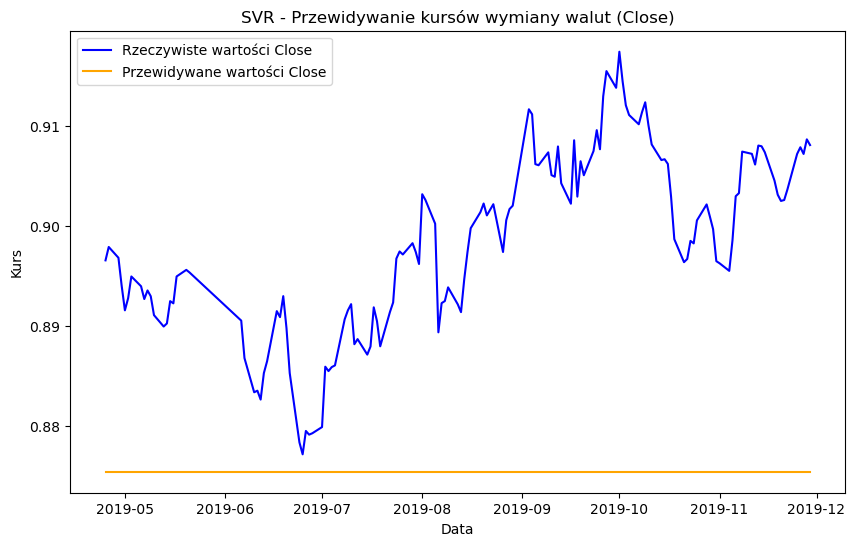

--- 0.0 seconds ---


In [10]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Wczytaj dane
file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

# Przetwarzanie danych
przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia['t_Close'] = przedpandemia['Close']
przedpandemia['t_Open'] = przedpandemia['Open']
przedpandemia['t_High'] = przedpandemia['High']

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - 2:]

X_columns = []
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Normalizacja danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# skalowanie y test obie
# inverse transform scaler test

# Użycie Support Vector Regression (SVR)
model_svr = SVR()
model_svr.fit(X_train_scaled, y_train)

y_pred_svr = model_svr.predict(X_test_scaled)

# Ocena modelu SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = sqrt(mean_squared_error(y_test, y_pred_svr))

print(f'SVR - MAE: {mae_svr:}, RMSE: {rmse_svr:}')

# Wykres rzeczywistych i przewidywanych wartości dla SVR
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
plt.plot(test_data['Date'], y_pred_svr, label='Przewidywane wartości Close', color='orange')
plt.title('SVR - Przewidywanie kursów wymiany walut (Close)')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()
plt.show()

SVR - MAE: 0.02953910994764397, RMSE: 0.037087733696606964


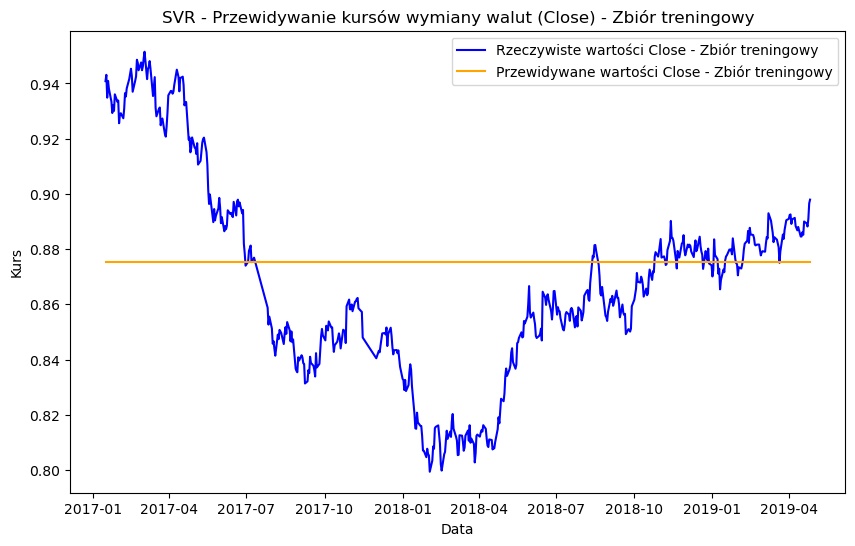

--- 0.0 seconds ---


In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Wczytaj dane
file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

# Przetwarzanie danych
przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia['t_Close'] = przedpandemia['Close']
przedpandemia['t_Open'] = przedpandemia['Open']
przedpandemia['t_High'] = przedpandemia['High']

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - 2:]

X_columns = []
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = train_data[X_columns]  # Zmiana na zbiór treningowy
y_test = train_data[y_column]  # Zmiana na zbiór treningowy

# Normalizacja danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Użycie Support Vector Regression (SVR)
model_svr = SVR()
model_svr.fit(X_train_scaled, y_train)

y_pred_svr = model_svr.predict(X_test_scaled)

# Ocena modelu SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = sqrt(mean_squared_error(y_test, y_pred_svr))

print(f'SVR - MAE: {mae_svr}, RMSE: {rmse_svr}')

# Wykres rzeczywistych i przewidywanych wartości dla SVR
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], y_test, label='Rzeczywiste wartości Close - Zbiór treningowy', color='blue')
plt.plot(train_data['Date'], y_pred_svr, label='Przewidywane wartości Close - Zbiór treningowy', color='orange')
plt.title('SVR - Przewidywanie kursów wymiany walut (Close) - Zbiór treningowy')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()
plt.show()

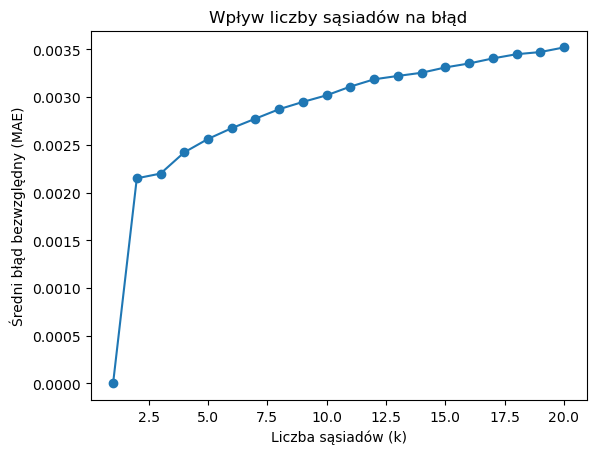

In [12]:
from sklearn.neighbors import KNeighborsRegressor

k_values = list(range(1, 21))
mae_values = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

plt.plot(k_values, mae_values, marker='o')
plt.title('Wpływ liczby sąsiadów na błąd')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średni błąd bezwzględny (MAE)')
plt.show()

Test Set:
MAE: 1.5041232328913595e-12
RMSE: 2.480297547269757e-12
MAPE: 1.6747302215188304e-10%


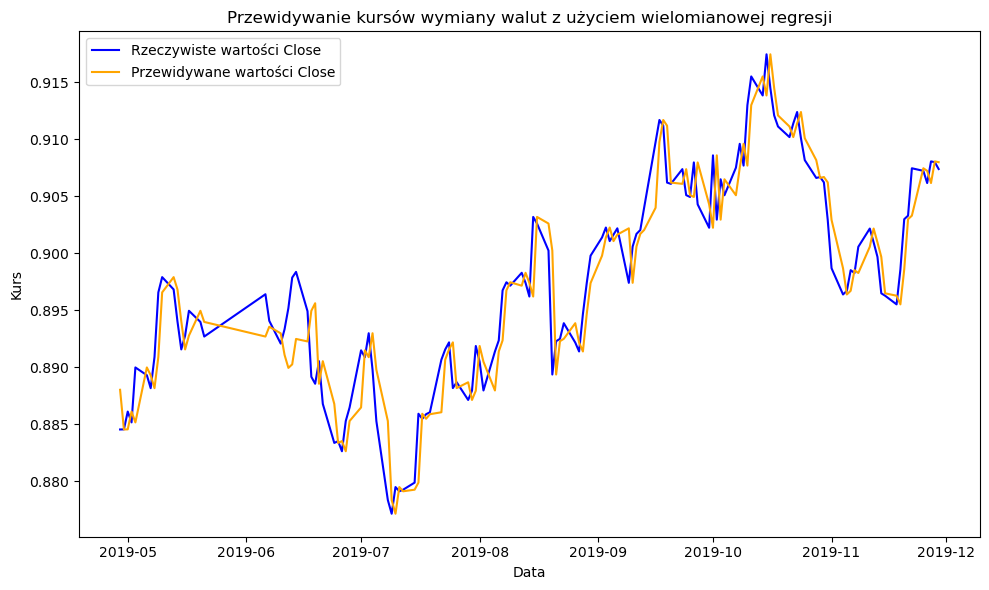

Czas działania: 0.3887028694152832 sekundy


In [13]:
# polymianowa 
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import time

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - max_lag:]

X_columns = []
y_columns = []

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')
    y_columns.extend([f't_(-{lag})_Close'])

X_train = train_data[X_columns]
y_train = train_data[y_columns]

X_test = test_data[X_columns]
y_test = test_data[y_columns]

degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_test = poly_model.predict(X_test_poly)  # Predict on the test set

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print(f'Test Set:')
print(f'MAE: {mae_test}')
print(f'RMSE: {rmse_test}')
print(f'MAPE: {mape_test:}%')

plt.figure(figsize=(10, 6))

# Dostosowanie indeksów czasowych
index_adjusted_test = test_data['Date'].iloc[max_lag:]

plt.plot(index_adjusted_test, y_test['t_(-10)_Close'].iloc[max_lag:], label='Rzeczywiste wartości Close', color='blue')
plt.plot(index_adjusted_test, y_pred_test[:, 0][:len(index_adjusted_test)], label='Przewidywane wartości Close', color='orange')

plt.title('Przewidywanie kursów wymiany walut z użyciem wielomianowej regresji')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()
plt.tight_layout()
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time} sekundy")

Training Set:
MAE: 0.029453021074998965
RMSE: 0.03717433898936554
MAPE: 9.91449147877714e-14


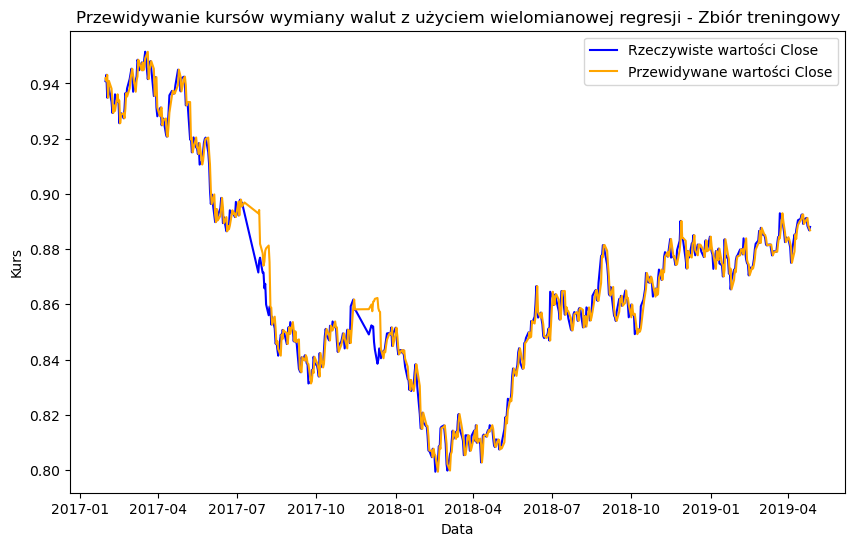

Czas działania: 0.3987925052642822 sekundy


In [14]:
#polymianowa
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import time

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - max_lag:]

X_columns = []
y_columns = []

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')
    y_columns.extend([f't_(-{lag})_Close'])

X_train = train_data[X_columns]
y_train = train_data[y_columns]

X_test = test_data[X_columns]
y_test = test_data[y_columns]

degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_train = poly_model.predict(X_train_poly)  

mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

print('Training Set:')
print(f'MAE: {mae_train}')
print(f'RMSE: {rmse_train}')
print(f'MAPE: {mape_train}')

plt.figure(figsize=(10, 6))

# Dostosowanie indeksów czasowych
index_adjusted_train = train_data['Date'].iloc[max_lag:]

plt.plot(index_adjusted_train, y_train['t_(-10)_Close'].iloc[max_lag:], label='Rzeczywiste wartości Close', color='blue')
plt.plot(index_adjusted_train, y_pred_train[:, 0][:len(index_adjusted_train)], label='Przewidywane wartości Close', color='orange')

plt.title('Przewidywanie kursów wymiany walut z użyciem wielomianowej regresji - Zbiór treningowy')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f'Czas działania: {elapsed_time} sekundy')

Test Set:
MAE: 3.9868468471026187e-07
RMSE: 5.526171267131965e-07
MAPE: 0.00%


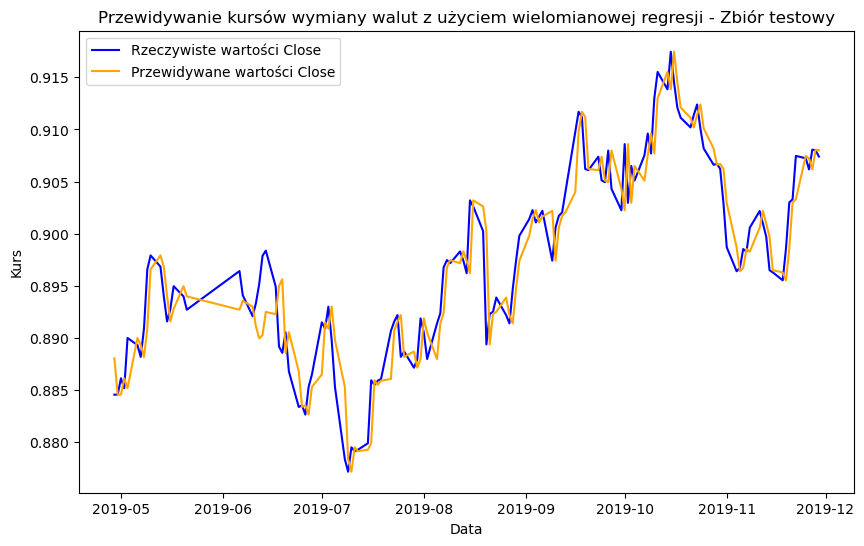

Czas działania: 2.5284528732299805 sekundy


In [15]:
# polymianowa
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import time

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - max_lag:]

X_columns = []
y_columns = []

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')
    y_columns.extend([f't_(-{lag})_Close', f't_(-{lag})_Open', f't_(-{lag})_High'])

X_train = train_data[X_columns]
y_train = train_data[y_columns]

X_test = test_data[X_columns]
y_test = test_data[y_columns]

degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_test = poly_model.predict(X_test_poly)  # Predict on the test set

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print(f'Test Set:')
print(f'MAE: {mae_test}')
print(f'RMSE: {rmse_test}')
print(f'MAPE: {mape_test:.2f}%')

plt.figure(figsize=(10, 6))

# Dostosowanie indeksów czasowych
index_adjusted_test = test_data['Date'].iloc[max_lag:]

plt.plot(index_adjusted_test, y_test['t_(-10)_Close'].iloc[max_lag:], label='Rzeczywiste wartości Close', color='blue')
plt.plot(index_adjusted_test, y_pred_test[:, 0][:len(index_adjusted_test)], label='Przewidywane wartości Close', color='orange')

plt.title('Przewidywanie kursów wymiany walut z użyciem wielomianowej regresji - Zbiór testowy')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time} sekundy")

Training Set:
MAE: 1.898726796628714e-15
RMSE: 2.694484329997306e-15
MAPE: 2.1836352393410082e-13%


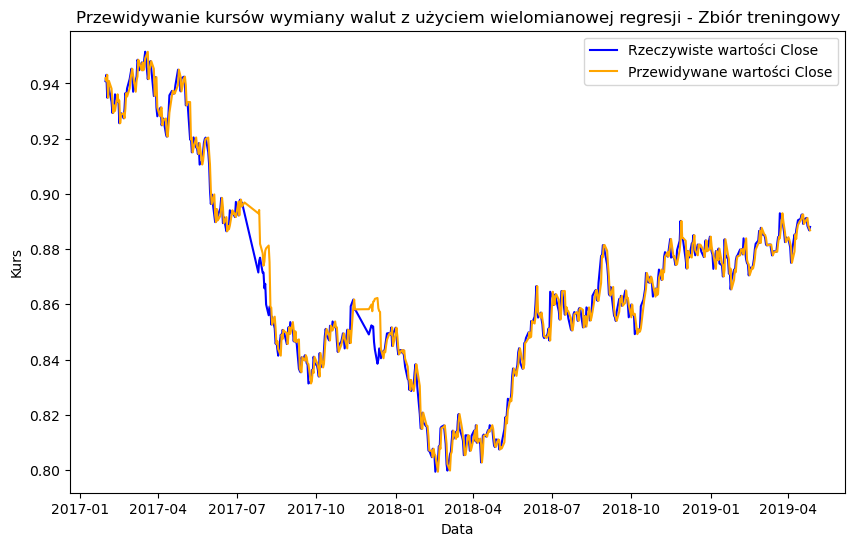

Czas działania: 2.2497408390045166 sekundy


In [16]:
#polymianowa
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import time

start_time = time.time()


file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - max_lag:]

X_columns = []
y_columns = []

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')
    y_columns.extend([f't_(-{lag})_Close', f't_(-{lag})_Open', f't_(-{lag})_High'])

X_train = train_data[X_columns]
y_train = train_data[y_columns]

X_test = test_data[X_columns]
y_test = test_data[y_columns]

degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_train = poly_model.predict(X_train_poly)  # Predict on the training set

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

print(f'Training Set:')
print(f'MAE: {mae_train:}')
print(f'RMSE: {rmse_train:}')
print(f'MAPE: {mape_train:}%')

plt.figure(figsize=(10, 6))

# Dostosowanie indeksów czasowych
index_adjusted_train = train_data['Date'].iloc[max_lag:]

plt.plot(index_adjusted_train, y_train['t_(-10)_Close'].iloc[max_lag:], label='Rzeczywiste wartości Close', color='blue')
plt.plot(index_adjusted_train, y_pred_train[:, 0][:len(index_adjusted_train)], label='Przewidywane wartości Close', color='orange')

plt.title('Przewidywanie kursów wymiany walut z użyciem wielomianowej regresji - Zbiór treningowy')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time} sekundy")
